In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, _),(x_test, _)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


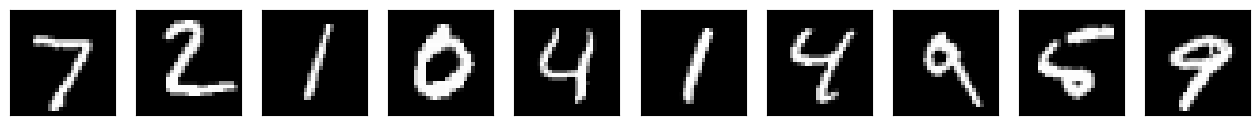

In [ ]:
n=10
plt.figure(figsize=(16,6))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [ ]:
# x_train=x_train.astype('float32')/255.
# x_test=x_test.astype('float32')/255.
# x_train=x_train.reshape((len(x_train),28,28,1))
# x_test=x_test.reshape((len(x_test),28,28,1))

# print(x_train.shape)
# print(x_test.shape)

In [ ]:
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Flatten,Dense,Reshape
from tensorflow.keras.models import Model

# Architecture of AutoEncoder

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Reshape, UpSampling2D
from tensorflow.keras.models import Model

input_layer_cnv = Input(shape=(28, 28, 1)) # this layer defines the shape of input data

ae_cnv_en = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(input_layer_cnv)
ae_cnv_en = MaxPooling2D((2, 2), padding='same')(ae_cnv_en)

ae_cnv_en = Conv2D(32, (3, 3), activation='relu', padding='same')(ae_cnv_en)
ae_cnv_en = MaxPooling2D((2, 2), padding='same')(ae_cnv_en)

ae_cnv_en = Conv2D(4, (3, 3), activation='relu', padding='same')(ae_cnv_en)
ae_cnv_en = MaxPooling2D((2, 2), padding='same')(ae_cnv_en)

ae_cnv_en = Flatten(name='umar')(ae_cnv_en)

# define the decoding layer
ae_cnv_de = Reshape((4, 4, 4), input_shape=(64,), name='umar0')(ae_cnv_en)
ae_cnv_de = Conv2D(4, (3, 3), activation='relu', padding='same', name='umar1')(ae_cnv_de)
ae_cnv_de = UpSampling2D((2, 2), name='botnext2')(ae_cnv_de)

ae_cnv_de = Conv2D(32, (3, 3), activation='relu', padding='same', name='umar3')(ae_cnv_de)
ae_cnv_de = UpSampling2D((2, 2), name='botnext4')(ae_cnv_de)

ae_cnv_de = Conv2D(32, (3, 3), activation='relu', padding='valid', name='zain5')(ae_cnv_de)
ae_cnv_de = UpSampling2D((2, 2), name='botnext6')(ae_cnv_de)

# Define the output layer
ae_cnv_de = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='asfand7')(ae_cnv_de)
Ae_cnv = Model(inputs=input_layer_cnv, outputs=ae_cnv_de)

Ae_cnv.compile(optimizer=tf.keras.optimizers.SGD(0.09, clipvalue=2.5), loss='binary_crossentropy', metrics=['accuracy'])
Ae_cnv.summary()
print(x_train.shape)



# Encoder

In [ ]:
ae_cnv_encoder=Model(inputs=input_layer_cnv,outputs=Ae_cnv.get_layer("bot").output,name='Conv_AE_encoder')
ae_cnv_encoder.summary()

Model: "Conv_AE_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 4)       

# Decpder

In [ ]:
encode_inp_cnv=Input(shape=(64,))
temp_dec=Ae_cnv.get_layer('botnext0')(encode_inp_cnv)
for i in range(1,8):
  st='botnext{}'.format(i)
  temp_dec=Ae_cnv.get_layer(st)(temp_dec)
  ae_cnv_decoder=Model(inputs=encode_inp_cnv,outputs=temp_dec,name='Conv_Ae_decoder')
  ae_cnv_decoder.summary()

Model: "Conv_Ae_decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64)]              0         
                                                                 
 botnext0 (Reshape)          (None, 4, 4, 4)           0         
                                                                 
 botnext1 (Conv2D)           (None, 4, 4, 4)           148       
                                                                 
Total params: 148 (592.00 Byte)
Trainable params: 148 (592.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "Conv_Ae_decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64)]              0         
                                                      

# Reshaping the data


In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# Training the autoencoder

In [ ]:
from time import time
tic=time()
Ae_cnv.fit(x_train,x_train,
           epochs=100,
           verbose=2,
           batch_size=1024,
           shuffle=False,validation_split=0.1)
toc=time()
print("Training Took {} Secs".format(toc-tic))

Epoch 1/100
53/53 - 2s - loss: 0.0055 - accuracy: 0.8088 - val_loss: 0.0054 - val_accuracy: 0.8088 - 2s/epoch - 32ms/step
Epoch 2/100
53/53 - 2s - loss: 0.0054 - accuracy: 0.8088 - val_loss: 0.0053 - val_accuracy: 0.8088 - 2s/epoch - 30ms/step
Epoch 3/100
53/53 - 2s - loss: 0.0053 - accuracy: 0.8088 - val_loss: 0.0053 - val_accuracy: 0.8088 - 2s/epoch - 30ms/step
Epoch 4/100
53/53 - 2s - loss: 0.0053 - accuracy: 0.8088 - val_loss: 0.0053 - val_accuracy: 0.8088 - 2s/epoch - 29ms/step
Epoch 5/100
53/53 - 2s - loss: 0.0053 - accuracy: 0.8088 - val_loss: 0.0053 - val_accuracy: 0.8088 - 2s/epoch - 30ms/step
Epoch 6/100
53/53 - 2s - loss: 0.0053 - accuracy: 0.8088 - val_loss: 0.0052 - val_accuracy: 0.8088 - 2s/epoch - 31ms/step
Epoch 7/100
53/53 - 2s - loss: 0.0052 - accuracy: 0.8088 - val_loss: 0.0052 - val_accuracy: 0.8088 - 2s/epoch - 31ms/step
Epoch 8/100
53/53 - 2s - loss: 0.0052 - accuracy: 0.8088 - val_loss: 0.0052 - val_accuracy: 0.8088 - 2s/epoch - 31ms/step
Epoch 9/100
53/53 - 2s -

# Passing images to encoder

In [ ]:
encoded_img=ae_cnv_encoder.predict(x_test)
print(encoded_img.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 64)


# Passing compressed images feature to decoder

313/313 [==============================] - 1s 2ms/step


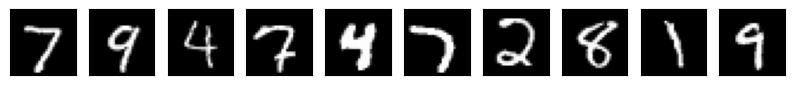

In [ ]:
decoded_img=ae_cnv_decoder.predict(encoded_img)
decoded_img=Ae_cnv.predict(x_test)
n=10
k=12
plt.figure(figsize=(10,6))
for i in range(n):
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(x_test[i*k].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display the reconsutroctoalll
  ax=plt.subplot(2,n,i+1+n)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()




313/313 [==============================] - 1s 2ms/step
Recreted representation of images


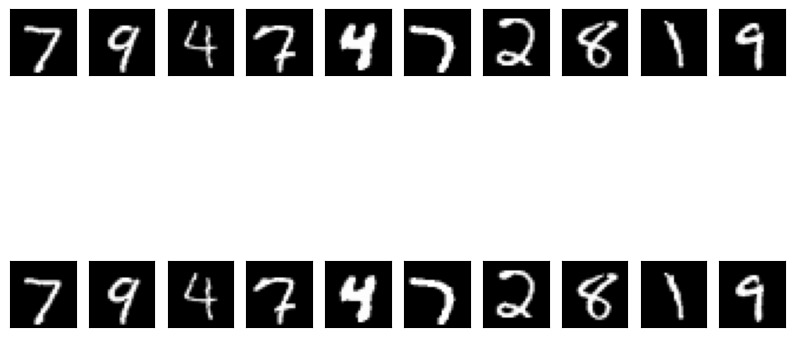

In [ ]:
decode_img=Ae_cnv.predict(x_test)
print("Recreted representation of images")
n=10
k=12
plt.figure(figsize=(10,6))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i*k].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # displaythe reconstructor images
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(x_test[i*k].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


# Adding noise in the data


In [ ]:
noise_factor=0.5
x_train_noisy=x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy=x_test + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)
print(x_train_noisy.shape,x_test_noisy.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


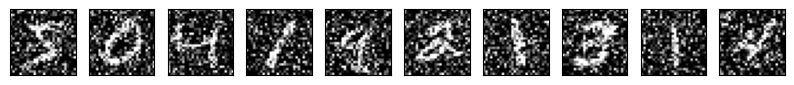

In [ ]:
n=10
plt.figure(figsize=(10,6))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(x_train_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Reshape, UpSampling2D
from tensorflow.keras.models import Model

input_layer_cnv = Input(shape=(28, 28, 1))

ae_cnv_en = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(input_layer_cnv)
ae_cnv_en = MaxPooling2D((2, 2), padding='same')(ae_cnv_en)

ae_cnv_en = Conv2D(32, (3, 3), activation='relu', padding='same')(ae_cnv_en)
ae_cnv_en = MaxPooling2D((2, 2), padding='same')(ae_cnv_en)

ae_cnv_en = Conv2D(4, (3, 3), activation='relu', padding='same')(ae_cnv_en)
ae_cnv_en = MaxPooling2D((2, 2), padding='same')(ae_cnv_en)

ae_cnv_en = Flatten(name='bot')(ae_cnv_en)

# define the decoding layer
ae_cnv_de = Reshape((4, 4, 4), input_shape=(64,), name='botnext0')(ae_cnv_en)
ae_cnv_de = Conv2D(4, (3, 3), activation='relu', padding='same', name='botnext1')(ae_cnv_de)
ae_cnv_de = UpSampling2D((2, 2), name='botnext2')(ae_cnv_de)

ae_cnv_de = Conv2D(32, (3, 3), activation='relu', padding='same', name='botnext3')(ae_cnv_de)
ae_cnv_de = UpSampling2D((2, 2), name='botnext4')(ae_cnv_de)

ae_cnv_de = Conv2D(32, (3, 3), activation='relu', padding='valid', name='botnext5')(ae_cnv_de)
ae_cnv_de = UpSampling2D((2, 2), name='botnext6')(ae_cnv_de)

# Define the output layer
ae_cnv_de = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='botnext7')(ae_cnv_de)
Ae_cnv_denoise = Model(inputs=input_layer_cnv, outputs=ae_cnv_de)

Ae_cnv_denoise.compile(optimizer=tf.keras.optimizers.SGD(0.09, clipvalue=2.5), loss='binary_crossentropy', metrics=['accuracy'])
Ae_cnv_denoise.summary()
print(x_train.shape)



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 4)           1156

# Encoder

In [ ]:
ae_cnv_encoder=Model(inputs=input_layer_cnv,outputs=Ae_cnv_denoise.get_layer("bot").output,name='Conv_AE_encoder')
ae_cnv_encoder.summary()

Model: "Conv_AE_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 4)       

# Decdoer

In [ ]:
encode_inp_cnv=Input(shape=(64,))
temp_dec=Ae_cnv_denoise.get_layer('botnext0')(encode_inp_cnv)
for i in range(1,8):
  st='botnext{}'.format(i)
  temp_dec=Ae_cnv_denoise.get_layer(st)(temp_dec)
  ae_cnv_decoder=Model(inputs=encode_inp_cnv,outputs=temp_dec,name='Conv_Ae_decoder')
  ae_cnv_decoder.summary()

Model: "Conv_Ae_decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64)]              0         
                                                                 
 botnext0 (Reshape)          (None, 4, 4, 4)           0         
                                                                 
 botnext1 (Conv2D)           (None, 4, 4, 4)           148       
                                                                 
Total params: 148 (592.00 Byte)
Trainable params: 148 (592.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "Conv_Ae_decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64)]              0         
                                                      

# Training the denoising auto_encoder

In [ ]:
from time import time
tic = time()
Ae_cnv_denoise.fit(x_train_noisy,x_train,
                   epochs=100,
                   verbose=2,
                   batch_size=256,
                   shuffle=False,validation_split = 0.1)
toc=time()
print("Training Took {} Secs".format(toc-tic))

Epoch 1/100
211/211 - 120s - loss: 0.1353 - accuracy: 0.8075 - val_loss: 0.1343 - val_accuracy: 0.8076 - 120s/epoch - 567ms/step
Epoch 2/100
211/211 - 115s - loss: 0.1352 - accuracy: 0.8075 - val_loss: 0.1342 - val_accuracy: 0.8076 - 115s/epoch - 547ms/step
Epoch 3/100
211/211 - 110s - loss: 0.1351 - accuracy: 0.8076 - val_loss: 0.1341 - val_accuracy: 0.8076 - 110s/epoch - 519ms/step
Epoch 4/100
211/211 - 110s - loss: 0.1349 - accuracy: 0.8076 - val_loss: 0.1339 - val_accuracy: 0.8076 - 110s/epoch - 520ms/step
Epoch 5/100
211/211 - 107s - loss: 0.1348 - accuracy: 0.8076 - val_loss: 0.1338 - val_accuracy: 0.8076 - 107s/epoch - 508ms/step
Epoch 6/100
211/211 - 111s - loss: 0.1347 - accuracy: 0.8076 - val_loss: 0.1337 - val_accuracy: 0.8077 - 111s/epoch - 524ms/step
Epoch 7/100
211/211 - 108s - loss: 0.1345 - accuracy: 0.8076 - val_loss: 0.1336 - val_accuracy: 0.8077 - 108s/epoch - 510ms/step
Epoch 8/100
211/211 - 110s - loss: 0.1344 - accuracy: 0.8077 - val_loss: 0.1335 - val_accuracy: 0

# see the image

In [ ]:
dns_decoded_img = Ae_cnv_denoise.predict(x_test_noisy)
n=10
k=16
plt.figure(figsize=(16,6))
for i in range(n):
  ax=plt.subplot((2,n,i+1))
  plt.imshow(x_test[i*k].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # Dispaly the reconstruct images
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i*k].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()